# COGS 118A- Final Project: Fake News Detection

- Seonghun Oh
- Yewon Hong
- Joshua Howon Kim

# Abstract 

As social media has become used from almost every person in the world, it has been easier for people to receive and share news. However, this easy access of news has also allowed it to be much easier to spread fake news. There are many platforms that purposely spread fake and biased news for their own benefit. It is very difficult for individuals to tell whether news is fake or real. Thus, this intentional spread of fake news is able to bring up many social conflicts, leading to disasters in the society. Therefore, it is very important for people to be able to correctly identify if the news they are reading is real or fake. The goal of our project is to solve this problem by using machine learning classifiers and correctly detecting if a news is real or fake. The data we are using is scraped from snopes.com which is a website that fact checks and analyzes information from the news. The variables in the dataset include: the title, comments by the public on the fact, claims to support the comment, label of the news (True, False, Miscaptioned), summary of the content, information that are true, false and unknown. We will be using these data to understand how each variable affects on the validity of the news content. In order to validate if the news is fake or not, we will be using multivariable logistic regression and SVM.   

# Background
As SNS spreads rapidly, fake news disguised as the media remains a major social problem. Fake news has become a particular public issue for the following reason:As online public opinion spheres are activated, people have diverse and easy access to platforms such as YouTube, and SNS. Unverified issues are produced and spread easily in that they can be freely spoken and shared information and opinions, making it easy for anyone to make news that may be extreme or wrongful, and spread them. Since 2017, academic research and discussion have gotten in earnest in the United States, where fake news remarked by Trump had been shifted to fake news.<a name="holannote"></a>[<sup>1</sup>](#holan)According to previous discussions of fake news, fake news has been broadly defined as A) for political and economic gain, B) deliberately distorting and fabricating, and C) false information disguised as media coverage.<a name="westnote"></a>[<sup>2</sup>](#west)With the introduction of artificial intelligence and various technology to distinguish fake news and unidentified information by SNS, media companies, also with the emergence of several fact-checking media show that media literacy has become a must for modern people.<a name="arxivnote"></a>[<sup>3</sup>](#arxiv) Machine Learning(ML) algorithm can be the solution. At first, the use of ML algorithm can detect fake news easily and automatically. In addition, the dataset can easily be collected to train calssifiers, especially supervised calssifiers. Since these classifiers depend on labelled datasets, by training these classifiers, we can identify fake news more accurately than from a human perspective.

# Problem Statement

Fake news damages certain people's reputation, violates someone’s privacy and personality rights and causes false prejudices against specific groups. Furthermore, it reduces the credibility of established media and other opinions and causes distortions in the process of forming political opinions. This causes social confusion and division, which harms civil society and its members and society as a whole. This is because it can cover facts and truths and spread false or distorted information to hinder the formation of sound public opinion. Naturally, such crackdowns and regulations on fake news are necessary. However, the biggest problem with fake news that we faced is that the current concept of fake news can be widespread and ambiguous. This is why the priority should be to find out what fake news is if legislation is to save damage to fake news. In a world of millions of news, they rely on manual human detection, so their scope is so limited that if the fake news is posted and deleted every minute, they cannot be manually responsible or executed. It can be a solution through the development of a system that provides reliable, automated exponential scores, namely trained machine learning.  solution through the development of a system that provides reliable, automated exponential scores, namely trained machine learning.

## Dataset1: 

https://github.com/COGS118A/Group011-Wi23/tree/main/liar_dataset

The data source used for this project is LIAR dataset which contains 3 files with .tsv format for test, train and validation. Below is some description about the data files used for this project.

##### LIAR: A BENCHMARK DATASET FOR FAKE NEWS DETECTION

William Yang Wang, "Liar, Liar Pants on Fire": A New Benchmark Dataset for Fake News Detection, to appear in Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (ACL 2017), short paper, Vancouver, BC, Canada, July 30-August 4, ACL.

original dataset contained 13 variables/columns for train, test and validation sets as follows:

`Column 1`: the ID of the statement ([ID].json)

`Column 2`: the label (Label class contains: True, Mostly-true, Half-true, Barely-true, FALSE, Pants-fire)

`Column 3`: the statement

`Column 4`: the subject(s)

`Column 5`: the speaker

`Column 6`: the speaker's job title

`Column 7`: the state info

`Column 8`: the party affiliation

 : For `Column 3`, we used countervectorize for statement, and `Column 4 to 8`, they are all discrete variables, so we didn’t consider to train this variables


`Column 9-13`: the total credit history count, including the current statement.

`Column 9`: barely true counts

`Column 10`: false counts

`Column 11`: half true counts

`Column 12`: mostly true counts

`Column 13`: pants on fire counts

`Column 14`: the context (venue / location of the speech or statement)

To make things simple we have chosen only 2 variables from this original dataset for this classification. The other variables can be added later to add some more complexity and enhance the features.

Below are the columns used to create 3 datasets that have been in used in this project

`Column 1`: Statement (News headline or text)

`Column 2`: Label (Label class contains: True, False)

newly created dataset has only 2 classes as compared to 6 from original classes. Below is method used for reducing the number of classes.

* Original -- 	New

* True -- 		True

* Mostly-true --  True

* Half-true -- 	 True

* Barely-true --   False

* False --		False

* Pants-fire --	False



## DATASET 2:

##### FAKE NEWS NET Dataset

https://github.com/COGS118A/Group011-Wi23/tree/main/FakeNewsNet

* politifact_fake.csv - Samples related to fake news collected from PolitiFact

* politifact_real.csv - Samples related to real news collected from PolitiFact

* gossipcop_fake.csv - Samples related to fake news collected from GossipCop

* gossipcop_real.csv - Samples related to real news collected from GossipCop




Each of the above CSV files is comma separated file and have the following columns


`id` - Unique identifider for each news

`url` - Url of the article from web that published that news

`title` - Title of the news article

`tweet_ids` - Tweet ids of tweets sharing news. This field is list of tweetids separated by tab.





LIAR dataset and the politifact and gossipcop datasets all contain information related to news and its veracity. They can be combined to create a larger dataset that can be used for training models to detect fake news. Use one dataset to validate the other: two datasets contain different types of information, they can be used to validate each other: LIAR dataset can be used to validate the performance of models trained on the politifact and gossipcop datasets, and vice versa. We can use one dataset for feature engineering:The politifact and gossipcop datasets can be used to extract features related to the sources of news articles, which can be used to train models on the LIAR dataset. Also, this shows using ensemble methods: Ensemble methods combine the predictions of multiple models to improve accuracy. By training models on both datasets and using ensemble methods, the overall performance of the model can be improved. In summary, combining datasets, using one dataset for feature engineering, and using ensemble methods can all be effective ways to use our two datasets. The most effective approach will depend on the specific research question and the nature of the data.


# Data Rangling

In [1]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sb

In [2]:
test_filename = './liar_dataset/test.tsv'
train_filename = './liar_dataset/train.tsv'
valid_filename = './liar_dataset/valid.tsv'

In [3]:
column_name = ['ID.json','label','statement','subject','speaker',"speaker's job title",'state','party affiliation','barely true counts','false counts','half true counts','mostly true counts','pants on fore counts','the context']
train_data_origin = pd.read_csv(train_filename, sep="\t")
test_data_origin = pd.read_csv(test_filename, sep="\t")
valid_data_origin = pd.read_csv(valid_filename, sep="\t")

train_data = train_data_origin.values.tolist()
test_data = test_data_origin.values.tolist()
valid_data = valid_data_origin.values.tolist()

train_data = pd.DataFrame(train_data, columns=column_name)
test_data = pd.DataFrame(test_data, columns=column_name)
valid_data = pd.DataFrame(valid_data, columns=column_name)

In [4]:
train_data.head()

,ID.json,label,statement,subject,speaker,speaker's job title,state,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fore counts,the context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [5]:
test_data.head()

,ID.json,label,statement,subject,speaker,speaker's job title,state,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fore counts,the context
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


In [6]:
valid_data.head()

,ID.json,label,statement,subject,speaker,speaker's job title,state,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fore counts,the context
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H."


In [7]:
# extract label and statement
train_news = train_data.iloc[:,1:3]
test_news = test_data.iloc[:,1:3]
valid_news = test_data.iloc[:,1:3]

In [8]:
train_news.head()

,label,statement
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...


Here we check the unique values of each label


In [9]:
#check the unique value of label
print(train_news['label'].value_counts())

half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64


Here we decided to make half-true, mostly-true, barely-true and true to be all true and false, and pants-fire to be false. Then we replaced those labels to binary labels being 1 for true and 0 for false.

In [10]:
# replace original label to binary label
train_news = train_news.replace({'label' : { 'half-true' : 1, 'false' : 0, 'mostly-true' : 1 , 'true' : 1, 'barely-true' : 0, 'pants-fire' : 0}})
test_news = test_news.replace({'label' : { 'half-true' : 1, 'false' : 0, 'mostly-true' : 1 , 'true' : 1, 'barely-true' : 0, 'pants-fire' : 0}})
valid_news = valid_news.replace({'label' : { 'half-true' : 1, 'false' : 0, 'mostly-true' : 1 , 'true' : 1, 'barely-true' : 0, 'pants-fire' : 0}})

In [11]:
train_news.head()

,label,statement
0,1,When did the decline of coal start? It started...
1,1,"Hillary Clinton agrees with John McCain ""by vo..."
2,0,Health care reform legislation is likely to ma...
3,1,The economic turnaround started at the end of ...
4,1,The Chicago Bears have had more starting quart...


In [12]:
print(train_news['label'].value_counts())

1    5752
0    4487
Name: label, dtype: int64


In [13]:
politifact_fake = pd.read_csv('./FakeNewsNet/politifact_fake.csv')
politifact_fake['label'] = 'fake'
politifact_real = pd.read_csv('./FakeNewsNet/politifact_real.csv')
politifact_real['label'] = 'real'
gossipcop_fake = pd.read_csv('./FakeNewsNet/gossipcop_fake.csv')
gossipcop_fake['label'] = 'fake'
gossipcop_real = pd.read_csv('./FakeNewsNet/gossipcop_real.csv')
gossipcop_real['label'] = 'real'

In [14]:
fake_news = pd.concat([politifact_fake, gossipcop_fake])
real_news = pd.concat([politifact_real, gossipcop_real])

In [15]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

<AxesSubplot:xlabel='label', ylabel='count'>

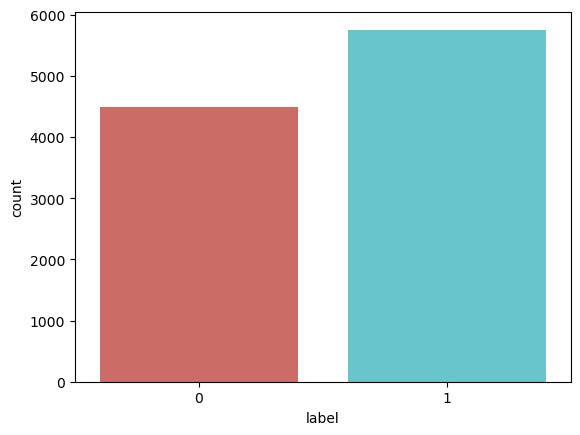

In [16]:
#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)

In [17]:
# check missing label
def data_qualityCheck():
    print('train data')
    print(train_news.isnull().sum())
    train_news.info()
    print('\n')
        
    print('test data')
    print(test_news.isnull().sum())
    test_news.info()
    print('\n')

    print('valid data')
    print(valid_news.isnull().sum())
    valid_news.info()

In [18]:
data_qualityCheck()

train data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10239 non-null  int64 
 1   statement  10239 non-null  object
dtypes: int64(1), object(1)
memory usage: 160.1+ KB


test data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1266 non-null   int64 
 1   statement  1266 non-null   object
dtypes: int64(1), object(1)
memory usage: 19.9+ KB


valid data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1266 n

In [19]:
train_news.dropna().shape

(10239, 2)

In [20]:
test_news.dropna().shape

(1266, 2)

# Evaluation Metrics

The evaluation metrics we will be using will be True positive rate (recall) and Accuracy. For recall, we will be using (correctly evaluating that news is false) / (correctly evaluating that news is false + evaluating that news is true when it is actually false). This recall rate is important for our problem because it tells us the rate of us being able to correctly evaluate that the news is false. For Accuracy, we will be using (correctly evaluating that news is false + evaluating that news is false when it is actually true) / (correctly evaluating that news is false + correctly evaluating that news is true + evaluating that news is true when it is actually false + evaluating that news is false when it is actually true). Accuracy is important for our problem because it tells us if our model was able to accurately make correct predictions in evaluating that the news is false. We will then plot an ROC curve to show the performance of the classification model and then find the AUC to provide an aggregate measure of performance across all possible classification thresholds.

# Proposed Solution

#### Benchmark model: 
BERT (Bidirectional Encoder Representations from Transformers), FakeNewsNet: https://arxiv.org/pdf/1809.01286.pdf

#### Solution: multivariable logistic regression

#### Library used: numpy, pandas, scikit-learn

Since our problem is a multiclass classification of evaluating if the news is True, Mostly-true, Half-true, Barely-true, FALSE, Pants-fire (6 labels), we will be using multi-class logistic regression. In order to process the test into input data, we will be using vectorization. Then we will be adding this vectorized input to variables from multiple columns and evaluate whether the news is true or false. Thus, we will be using multivariable logistic regression. First of all, we will be dividing the dataset into training/validation set and test set. Next, because vectorizing the text into word units creates too many variables, we will be using normalization. Because we will be needing strong normalization, we believe that using L1 normalization will be effective. The search plane itself is a vectorized text, therefore it is possible for it to become very high dimension which may result in being stuck in the local minima. In order to prevent this problem, we will be using momentum in our training. Also, in order to quickly do weight updates in training, we will be using mini-batch. In the validation step, we will be using K-fold cross validation to retreive the most accurate model. 

#### Text Processing
After converting articles into token lists through CountVectorizer, TfidTransformer, and TfidVectorizer, vectorize them based on the count and frequency of appearance of tokens. In addition, TfidVectorier creates a BOW encoding vector that weights words in a TF-IDF, enabling document preprocessing. Using the TF-IDF method, you can manually adjust the parameter C to use an estimate that is a LogisticRegressionCV. Specifying cv=5, using kfold cross-validation for hyperparameter tuning. The criterion for model measurement is the accuracy of classification, and by setting it to n_jobs=-1, all CPU cores are dedicated. We’ll evaluate the performance by maximizing the number of iterations of the optimization algorithm.

#### Modeling
As a classification model, machine learning algorithms can be used 
a) Logistic Registration, b) SVM, c) Random Forest, and boosted trees(AdaBoost)

First, modeling using the logistic regression algorithm.
For modeling, separate train, validation sets and test set.
Using the same dataset and the same text method and train_test_split, we can create logistic regression models that classify news as real or fake news. After organizing and preprocessing text data, performing feature extraction, and building and distributing a logistic regression classifier using the scikit-learn, evaluate the accuracy of the model.
Second, Using SVM(Support Vector Machines) to build classification prediction models and compare prediction accuracy on datasets for verification.
Third, tree-based random forest. Using Adaboost to fit the shallow decision tree on the train set, and additional classifiers can be placed on the same data to correct errors and can be weighted. 
Also, k-fold cross-validation, which is known to be useful because the amount of data is not enough to experiment with a larger amount of data on a smaller dataset to increase the statistical reliability of methodological performance measurements.

#### Evaluation
Confusion matrix : f1_score, report / Precision, recall 


#### What we see moving forward and limitations
Using RNN, CNN, and LSTM, which are algorithms of deep learning could have analyzed with better performance. However, we need to review whether there are enough samples for deep learning, and we can later create a model using appropriate algorithms by devising how to classify new articles that we have never seen before. 

# Results

In [21]:
#Feature select

In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yewonhong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# CounterVectorizer

In [25]:
countV = CountVectorizer(stop_words=stopwords.words('english'))
train_count = countV.fit_transform(train_news['statement'].values)

In [26]:
print(train_count.shape)
# (# of statement, # of word(all word in every statement) in statement)

(10239, 12060)


In [27]:
print(train_count[0])
# print(countV.vocabulary_)

  (0, 3158)	1
  (0, 2449)	1
  (0, 10330)	1
  (0, 10331)	2
  (0, 7347)	1
  (0, 4819)	1
  (0, 11027)	1
  (0, 1513)	1
  (0, 8466)	1
  (0, 4869)	1
  (0, 1941)	1
  (0, 749)	1


## TF-IDF

In [28]:
tfidfV = TfidfVectorizer(use_idf = True,stop_words = stopwords.words('english'),ngram_range=(1, 2), max_df=300)
train_tfidf = tfidfV.fit_transform(train_news['statement'].values)

In [29]:
print(train_tfidf.shape)

(10239, 85862)


In [30]:
print(train_tfidf[0])

  (0, 12450)	0.22202408693881748
  (0, 31951)	0.19903085986550703
  (0, 58219)	0.18041282385564963
  (0, 9578)	0.2394177917569828
  (0, 71745)	0.2394177917569828
  (0, 77780)	0.2292431266897432
  (0, 31666)	0.2394177917569828
  (0, 49524)	0.18571537445922032
  (0, 71759)	0.2394177917569828
  (0, 71735)	0.2394177917569828
  (0, 16251)	0.2394177917569828
  (0, 21471)	0.2394177917569828
  (0, 4550)	0.1302527364495592
  (0, 12448)	0.18723667730248678
  (0, 31946)	0.14445804970744705
  (0, 9572)	0.1944557170534125
  (0, 77723)	0.13107555808862625
  (0, 31630)	0.14532844256774455
  (0, 49521)	0.18041282385564963
  (0, 71739)	0.3260382380749686
  (0, 71714)	0.17319378410472394
  (0, 16235)	0.17812999518480985
  (0, 21468)	0.20167475680433822


## Embedding (word2vec)

In [31]:
word_token = []
for sentence in train_news['statement'].values:
    token = list(sentence.lower().split())
    word_token.append(token)

In [32]:
model = Word2Vec(sentences=word_token)
model.init_sims(replace=True)

/var/folders/c_/sch32ylx6b541jfnlv91jrrr0000gn/T/ipykernel_80226/2640026966.py:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [33]:
word2vec = model.wv
print(word2vec.get_vector('.'))

[-0.07000449 -0.09779034 -0.08695689  0.02601152 -0.12428884 -0.01682256
  0.14179638  0.26651692 -0.2018     -0.08966836 -0.05134785 -0.15157285
  0.09556167  0.12874742 -0.05139925  0.0442577   0.04362821 -0.13893571
 -0.01014397  0.02562408  0.08318906 -0.11261829 -0.02276646 -0.14732078
  0.02208159 -0.0850288  -0.02252556 -0.09296829 -0.19384684 -0.01631116
  0.10473426  0.00596667 -0.06562537  0.04251079  0.14615329  0.03212364
  0.08706075 -0.06008937  0.00564347 -0.07054214  0.05827014 -0.14778487
 -0.147528    0.14210063  0.19046679 -0.05254083 -0.09817097  0.02665533
 -0.08164979  0.1650453   0.14547071 -0.06282981 -0.15932797 -0.02569474
  0.04682675  0.08663637 -0.01080892  0.10851996 -0.16986269 -0.06564496
  0.05521058  0.05766286 -0.04040594 -0.02385634 -0.12884896 -0.01240637
  0.06557431  0.18118857  0.00959793  0.1771666  -0.02840185 -0.13202465
  0.00839508  0.02204629  0.04171372  0.1321411   0.03269337  0.03751546
  0.06377356  0.00508511 -0.12181905 -0.07633296 -0

In [34]:
model.wv.most_similar('coal','decline') 
# model.similarity('coal','decline')

[('you', 0.3736054599285126),
 ('be', 0.32971158623695374),
 ('they', 0.32881659269332886),
 ('if', 0.3152616322040558),
 ('we', 0.30659618973731995),
 ('get', 0.28460466861724854),
 ('have', 0.28220221400260925),
 ('wear', 0.2817659080028534),
 ('to', 0.27791470289230347),
 ('campaigns.', 0.2670023441314697)]

In [36]:
! pip install import_ipynb
! pip install sklearn_evaluation

In [37]:
import import_ipynb #Annotate later

In [39]:
import Feature


In [40]:
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, roc_curve, roc_auc_score
import sklearn_evaluation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [41]:
# define train, test, validation set
X_train = train_news['statement']
y_train = train_news['label']

X_test = test_news['statement']
y_test = test_news['label']

X_val = valid_news['statement']
y_val = valid_news['label']

# define whole dataset
X = pd.concat([X_train, X_test, X_val])
y = pd.concat([y_train, y_test, y_val])

In [42]:
# define classification function using model
def classification(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # using 5 fold cross validation
    train_size,train_score,test_score = learning_curve(clf, X_train, y_train, cv=5)
    sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)
    
    acc = np.mean(y_test == y_pred)
    clf_table = classification_report(y_test, y_pred, target_names=['false', 'true'])
    
    return acc, clf_table

In [43]:
def plot_results(gridsearchcv):
    params = gridsearchcv.cv_results_["params"]
    ys = gridsearchcv.cv_results_["mean_test_score"]
    xs = ['|'.join(str(v) for v in param.values()) for param in params]
    yerr = gridsearchcv.cv_results_["std_test_score"]
    plt.errorbar(xs, ys, yerr / np.sqrt(gridsearchcv.cv), fmt='.k')
    plt.ylabel("f1")
    plt.xlabel("params")

In [44]:
import warnings
warnings.filterwarnings('ignore')

## Logistic regression

In [45]:
model_lgr = Pipeline([
        ('feature',countV),
        ('logistic',LogisticRegression(max_iter = 100))
        ])

{'feature': TfidfVectorizer(max_df=300, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...]), 'logistic__C': 1.0, 'logistic__penalty': 'l2'}


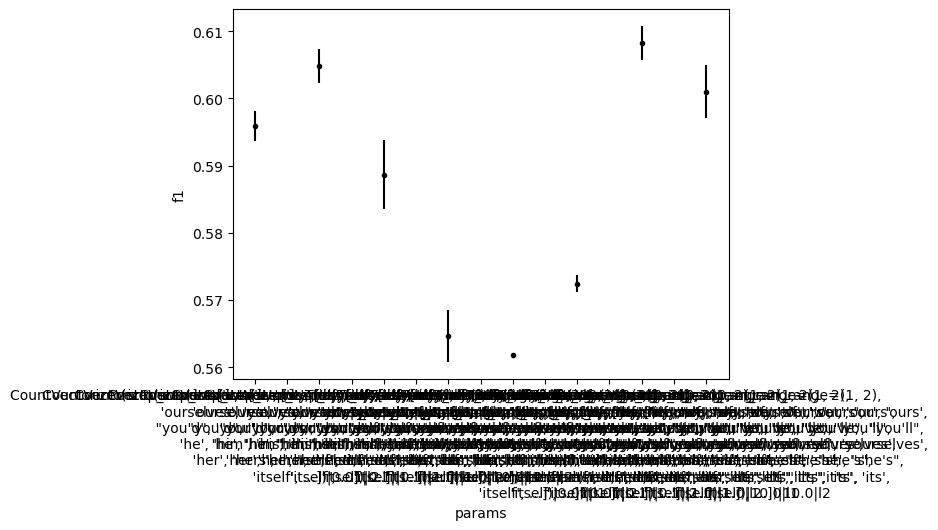

In [46]:
param_grid = {
    'feature':[countV, tfidfV],
    'logistic__C': [0.01, 0.1, 1.0, 10.0],
    'logistic__penalty': ['l1', 'l2']
}
search_lgr = GridSearchCV(model_lgr, param_grid, scoring = 'f1_micro',cv=5)
search_lgr.fit(X_train, y_train)
print(search_lgr.best_params_)
plot_results(search_lgr)

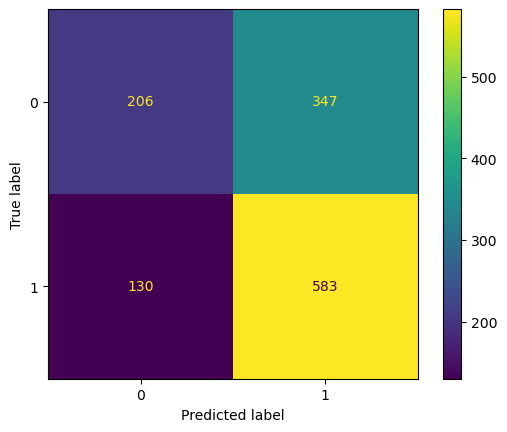

              precision    recall  f1-score   support

       false       0.61      0.37      0.46       553
        true       0.63      0.82      0.71       713

    accuracy                           0.62      1266
   macro avg       0.62      0.60      0.59      1266
weighted avg       0.62      0.62      0.60      1266



In [47]:
y_pred = search_lgr.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

clf_table = classification_report(y_test, y_pred, target_names=['false', 'true'])
print(clf_table)

0.607619030710976
Area under the Receiver Operating Characteristic curve: 0.607619030710976


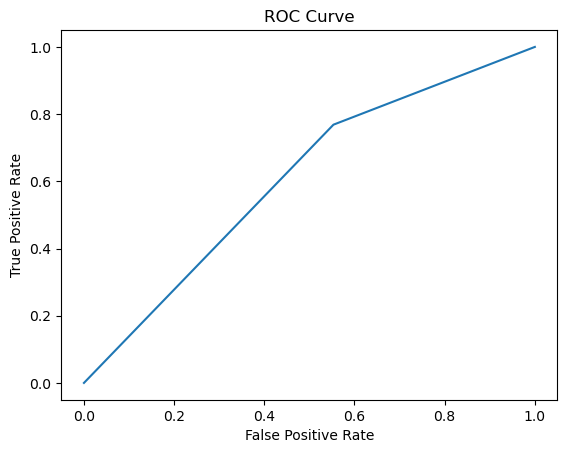

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc) 

## SVM

In [56]:
model_svm = Pipeline([
        ('feature',tfidfV),
        ('svm', SVC(probability=True))
         ])

{'feature': CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...]), 'svm__kernel': 'rbf'}


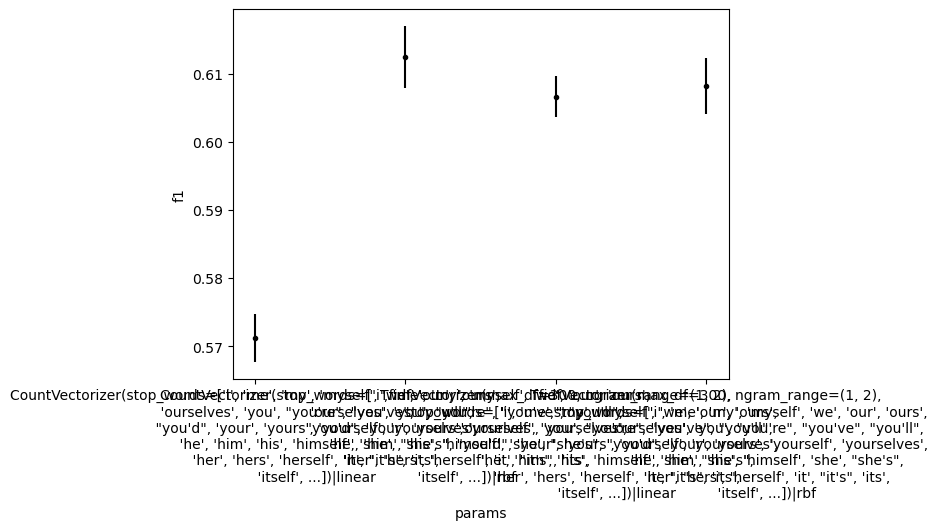

In [57]:
param_grid = {
    'feature':[countV, tfidfV],
    'svm__kernel':['linear', 'rbf']
}
search_svm = GridSearchCV(model_svm, param_grid, scoring = 'f1_micro',cv=5)
search_svm.fit(X_train, y_train)
print(search_svm.best_params_)
plot_results(search_svm)

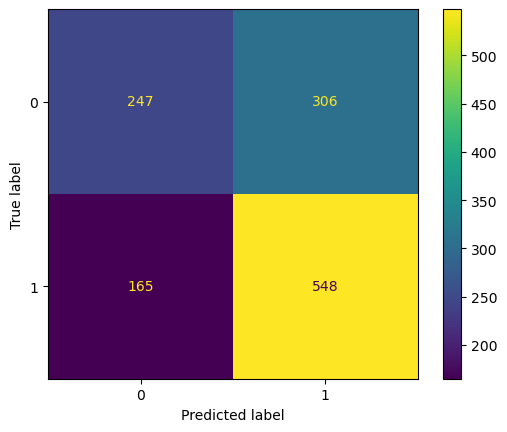

              precision    recall  f1-score   support

       false       0.60      0.45      0.51       553
        true       0.64      0.77      0.70       713

    accuracy                           0.63      1266
   macro avg       0.62      0.61      0.61      1266
weighted avg       0.62      0.63      0.62      1266



In [58]:
y_pred = search_svm.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

clf_table = classification_report(y_test, y_pred, target_names=['false', 'true'])
print(clf_table)

0.607619030710976
Area under the Receiver Operating Characteristic curve: 0.607619030710976


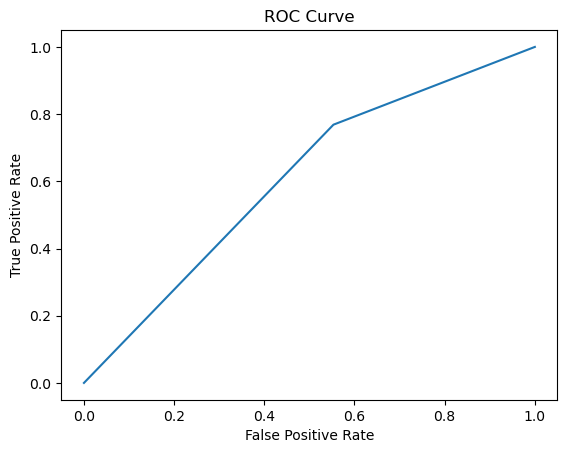

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc) 

In [60]:
model_knn = Pipeline([
        ('feature',countV),
        ('knn',KNeighborsClassifier())
        ])

{'feature': TfidfVectorizer(max_df=300, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...]), 'knn__n_neighbors': 19}


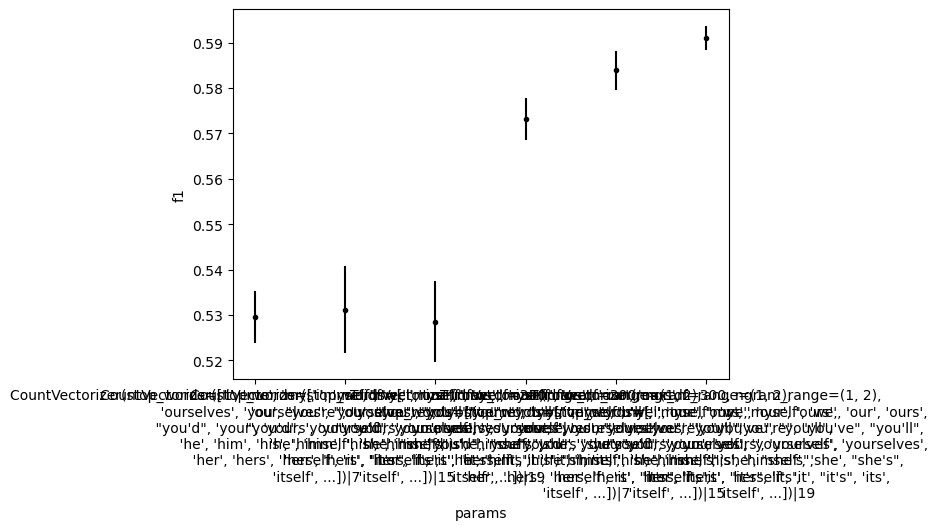

In [61]:
param_grid = {
    'feature':[countV, tfidfV],
    'knn__n_neighbors':[7,15,19]
}
search_knn = GridSearchCV(model_knn, param_grid, scoring = 'f1_micro',cv=5)
search_knn.fit(X_train, y_train)
print(search_knn.best_params_)
plot_results(search_knn)

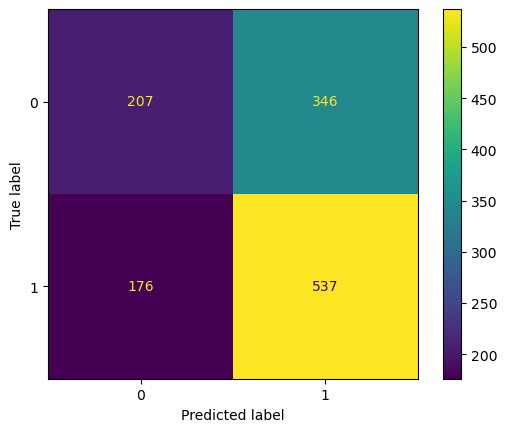

              precision    recall  f1-score   support

       false       0.54      0.37      0.44       553
        true       0.61      0.75      0.67       713

    accuracy                           0.59      1266
   macro avg       0.57      0.56      0.56      1266
weighted avg       0.58      0.59      0.57      1266



In [62]:
y_pred = search_knn.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

clf_table = classification_report(y_test, y_pred, target_names=['false', 'true'])
print(clf_table)

0.5637387804376992
Area under the Receiver Operating Characteristic curve: 0.5637387804376992


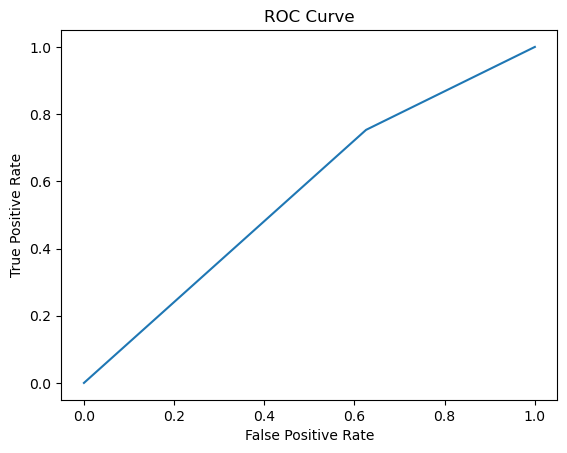

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc) 

## Random Forest

Optimize model hyperparameters: Random Forest Classifier has several hyperparameters that can be tuned to improve the model's performance.

In [64]:
# random forest
model_rf = Pipeline([
        ('feature',Feature.countV),
        ('rf',RandomForestClassifier(n_jobs=3))
        ])

{'feature': CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...]), 'rf__n_estimators': 100}


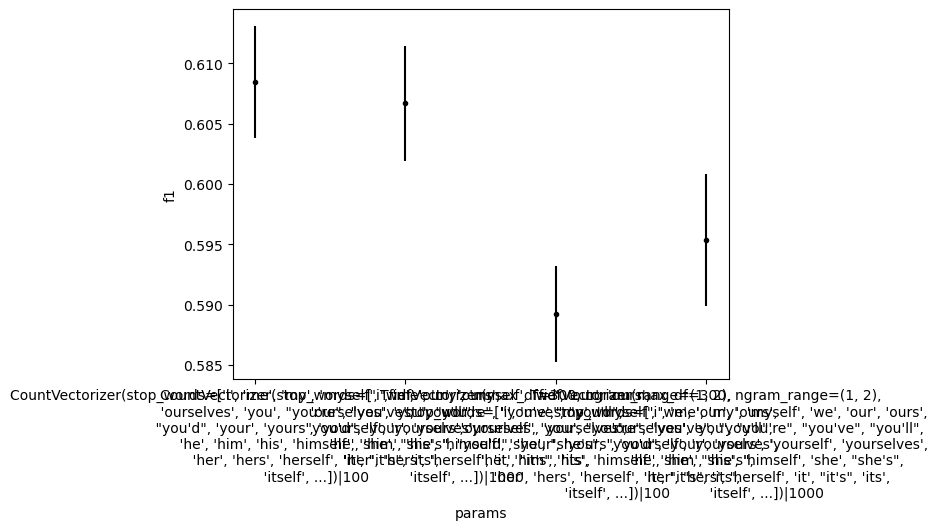

In [65]:
param_grid = {
    'feature':[countV, tfidfV],
    'rf__n_estimators':[100,1000]
}
search_rf = GridSearchCV(model_rf, param_grid, scoring = 'f1_micro',cv=5)
search_rf.fit(X_train, y_train)
print(search_rf.best_params_)
plot_results(search_rf)

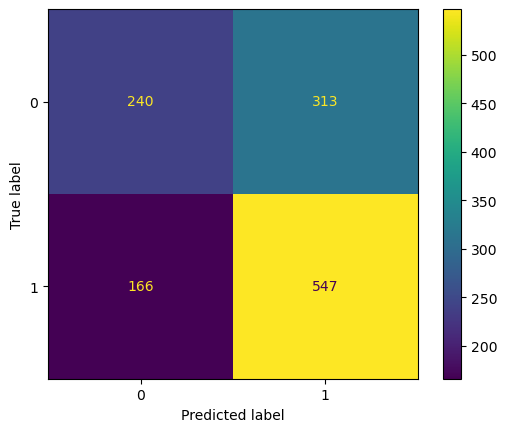

              precision    recall  f1-score   support

       false       0.59      0.43      0.50       553
        true       0.64      0.77      0.70       713

    accuracy                           0.62      1266
   macro avg       0.61      0.60      0.60      1266
weighted avg       0.62      0.62      0.61      1266



In [66]:
y_pred = search_rf.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

clf_table = classification_report(y_test, y_pred, target_names=['false', 'true'])
print(clf_table)

0.6005886545148356
Area under the Receiver Operating Characteristic curve: 0.6005886545148356


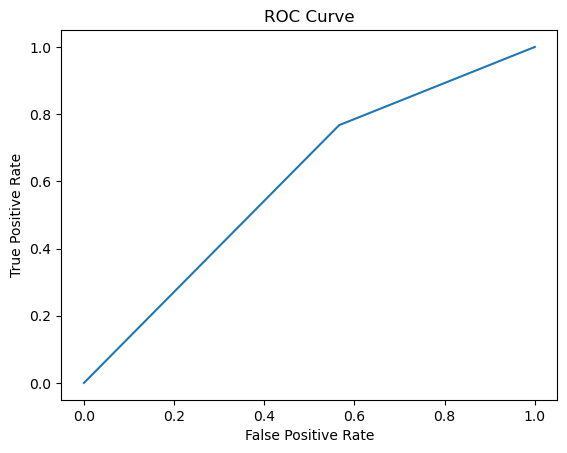

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc) 

## Gradient Boost Machine(GBM)

In [68]:
model_gbm = Pipeline([
        ('feature',Feature.countV),
        ('gbm',GradientBoostingClassifier(random_state=0))
        ])

{'feature': CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])}


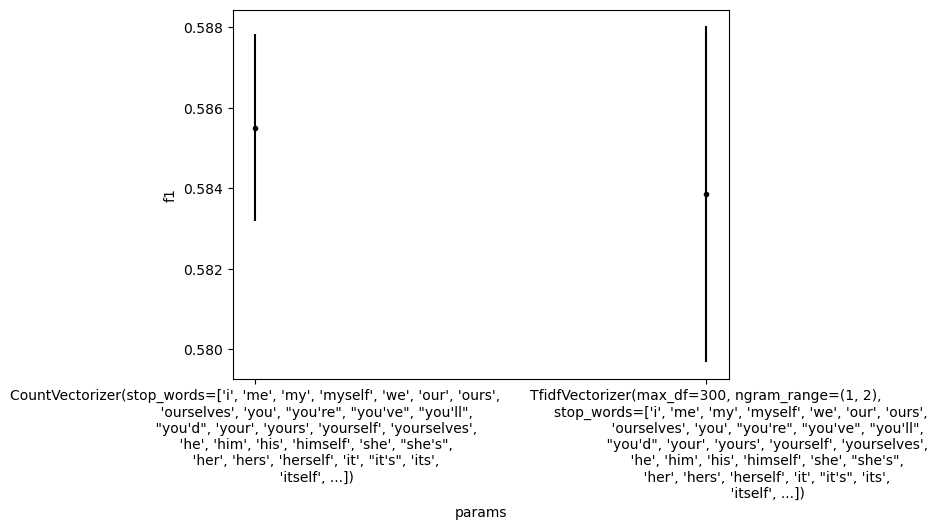

In [69]:
param_grid = {
    'feature':[countV, tfidfV],
}
search_gbm = GridSearchCV(model_gbm, param_grid, scoring = 'f1_micro',cv=5)
search_gbm.fit(X_train, y_train)
print(search_gbm.best_params_)
plot_results(search_gbm)

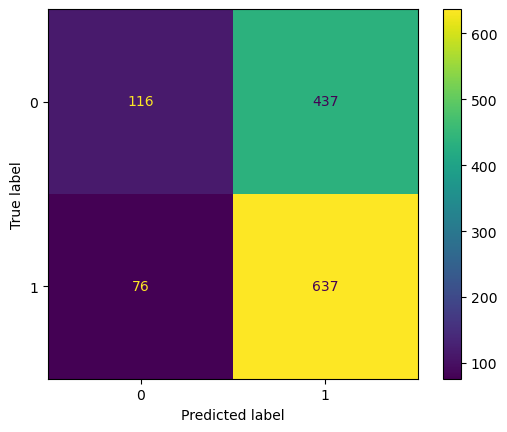

              precision    recall  f1-score   support

       false       0.60      0.21      0.31       553
        true       0.59      0.89      0.71       713

    accuracy                           0.59      1266
   macro avg       0.60      0.55      0.51      1266
weighted avg       0.60      0.59      0.54      1266



In [71]:
y_pred = search_gbm.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

clf_table = classification_report(y_test, y_pred, target_names=['false', 'true'])
print(clf_table)

0.5515865266340172
Area under the Receiver Operating Characteristic curve: 0.5515865266340172


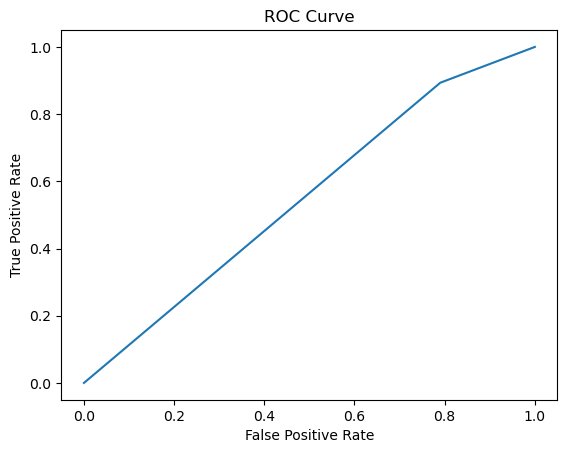

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc) 

## Ensemble

take each model with best hyperparameter according to grid search result

In [76]:
lgr_best = Pipeline([
        ('feature',tfidfV),
        ('logistic',LogisticRegression(max_iter = 100, C =1.0, penalty='l2'))
        ])
svm_best = Pipeline([
        ('feature',countV),
        ('svm', SVC(probability=True, kernel='rbf'))
         ])
knn_best = Pipeline([
        ('feature',tfidfV),
        ('knn',KNeighborsClassifier(n_neighbors=19))
        ])
rf_best = Pipeline([
        ('feature',countV),
        ('rf',RandomForestClassifier(n_estimators=1000, n_jobs=3))
        ])
gbm_best = Pipeline([
        ('feature',countV),
        ('gbm',GradientBoostingClassifier(random_state=0))
        ])

In [82]:
voting_model = VotingClassifier(
    estimators=[('lgr',lgr_best),('svm',svm_best),('knn',knn_best),('rf',rf_best),('gbm',gbm_best)], # 3개의 약한 학습기
    voting='hard'
)

In [85]:
voting_model.fit(X_train,y_train)

VotingClassifier(estimators=[('lgr',
                              Pipeline(steps=[('feature',
                                               TfidfVectorizer(max_df=300,
                                                               ngram_range=(1,
                                                                            2),
                                                               stop_words=['i',
                                                                           'me',
                                                                           'my',
                                                                           'myself',
                                                                           'we',
                                                                           'our',
                                                                           'ours',
                                                                           'ourselves',
          

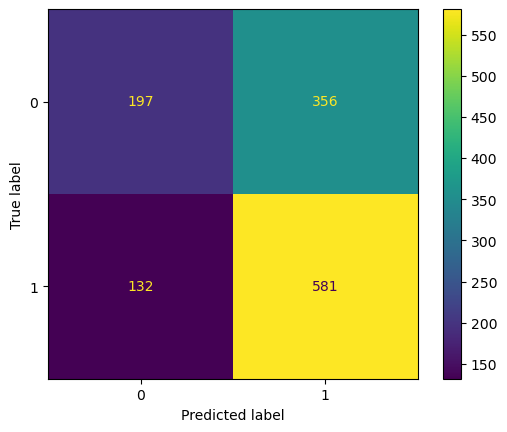

              precision    recall  f1-score   support

       false       0.60      0.36      0.45       553
        true       0.62      0.81      0.70       713

    accuracy                           0.61      1266
   macro avg       0.61      0.59      0.58      1266
weighted avg       0.61      0.61      0.59      1266



In [86]:
y_pred = voting_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

clf_table = classification_report(y_test, y_pred, target_names=['false', 'true'])
print(clf_table)

0.5855527290895765
Area under the Receiver Operating Characteristic curve: 0.5855527290895765


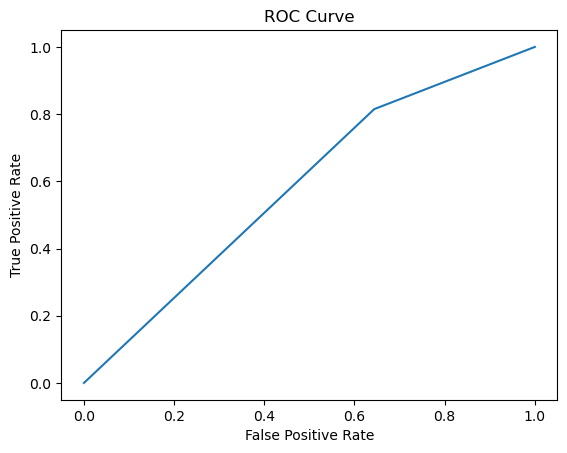

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc) 

Evaluation Metrics: While accuracy is a commonly used metric for classification tasks, it may not always be the best indicator of model performance, especially in cases where the class distribution is imbalanced. We considered using additional metrics such as precision, recall, F1-score, and ROC-AUC score to evaluate the performance of the model.

In [ ]:
# logistic reguression with l2 regularization and less C
acc, table = classification(model_lgr, X, y)
print("accuracy : ",acc)
print(table)

In [ ]:
# linear svm with hinge loss
acc, table = classification(model_svm, X, y)
print("accuracy : ",acc)
print(table)

In [ ]:
# random forest
acc, table = classification(model_rf, X, y)
print("accuracy : ",acc)
print(table)

Also, we can consdier using an ensemble of models for better one. Ensemble methods such as bagging, boosting, and stacking can help improve the performance of the model by combining the predictions of multiple models. Consider using an ensemble of multiple Random Forest models or combining the Random Forest model with other models such as Logistic Regression, Naive Bayes, or Support Vector Machines.

We found the best hyperparameters for each model through grid search and implemented an ensemble model using each model with the best hyperparameters obtained from each task to improve performance and increase model complexity.

# Results

In [ ]:
# Predict

In [97]:
import pickle
var = input("")

def detect_fake_news(var):    
    pred = voting_model.predict([var])

    return (print("Entered statement: ",bool(pred[0])))

if __name__ == '__main__':
    detect_fake_news(var)

This project is easy
Entered statement:  False


We used countervectors as a feature to determine how many times each word appeared in a sentence. In addition, we used tf-idf to consider how frequently a word is used within a document. For example, the word "I" may appear frequently in all sentences, but it may not be a distinguishing feature within a single sentence. To avoid excessive frequency checks in the countervector that represents word frequency, we use tf-idf to assign a lower importance to these types of words. Additionally, in feature selection, we use stop words to exclude relatively meaningless words such as "I," "me," and "don't."


# Discussion

### Interpreting the result

Here we have build all the classifiers for predicting the fake news detection. The extracted features are fed into different classifiers. We have used Naive-bayes, Logistic Regression, Linear SVM, Stochastic gradient descent and Random forest classifiers from sklearn. Each of the extracted features were used in all of the classifiers. Once fitting the model, we compared the f1 score and checked the confusion matrix. After fitting all the classifiers, 2 best performing models were selected as candidate models for fake news classification. We have performed parameter tuning by implementing GridSearchCV methods on these candidate models and chosen best performing parameters for these classifier. Finally selected model was used for fake news detection with the probability of truth. In Addition to this, We have also extracted the top 50 features from our term-frequency tfidf vectorizer to see what words are most and important in each of the classes. We have also used Precision-Recall and learning curves to see how training and test set performs when we increase the amount of data in our classifiers.

### Limitations

We attempted to perform NLP tasks using simple machine learning algorithms instead of deep learning models such as RNN, LSTM, and Transformer. To use words in a sentence as features, we tried to extract feature vectors using two methods: counter vectorization and tf-idf vectorization.

In the end, most of the models did not achieve high accuracy even with multiple rounds of grid search, ensemble, and boosting. We were able to conclude that performing NLP tasks with simple machine learning algorithms is not easy. The main reason is that NLP tasks involve many parameters, and unless the model can implement complex non-linearity, its complexity will be reduced, making it difficult to improve accuracy. The biggest issue lies in the method of vectorizing words to create features. Both count vectorization and tf-idf vectorization create sparse features. Sparse features refer to features where most of the feature values are zero, making it difficult to determine a meaningful feature vector to determine the truth or falsehood of a sentence.

Therefore, an effective solution is to embed words to maintain the unique characteristics of the features while reducing the dimensions to a meaningful level. Another way is to increase the complexity of the model.

Furthermore, we predicted that performance would improve if we reduce the dimensionality of the vectors rather than using high-dimensional vectors. We expect that PCA or word2vec could be used to extract features and help achieve this.
 

### Ethics & Privacy

n our dataset, we recognize that there may be potential ethical concerns that arise from retrieving data from previously published news articles. As our dataset aims to evaluate the veracity of news articles, there is a possibility that our findings may be construed as a criticism of the work of individual journalists or publishers. Such criticism could potentially harm the careers of those individuals, particularly if our findings are widely disseminated and negatively received.

Furthermore, our use of someone else's work without their permission may raise privacy concerns, particularly if we are evaluating the work without the publisher's knowledge or consent. We recognize that these concerns are valid and that it is important to approach such issues with sensitivity and care.

However, we believe that the potential benefits of our project outweigh these ethical concerns. It is an unfortunate reality that news itself is often biased or inaccurate, and it is the responsibility of readers to discern which sources they can trust. By providing a dataset that evaluates the veracity of news articles, we hope to empower readers to make more informed decisions and to foster a greater sense of media literacy.

Moreover, we are committed to addressing ethical concerns in our dataset by ensuring that our methods are transparent, rigorous, and unbiased. We are mindful of the potential harm that our findings may cause to individual journalists and publishers and we will take every effort to ensure that our results are presented in a way that is fair and balanced.

In conclusion, while we recognize that there are ethical concerns that arise from using previously published news articles in our dataset, we believe that the potential benefits of our project are significant. By providing a comprehensive and unbiased dataset, we hope to contribute to a more informed and media-literate society. We are committed to addressing ethical concerns in our work and will take every effort to ensure that our findings are presented in a way that is sensitive and responsible. 

### Conclusion


Our goal for this project was to classify fake news using different evaluation methods. The methods we used was vanilla logistic regression, logistic regression with 12 regularization and less C, vanilla linear SVM, and linear SVM with hinge loss. Out of those methods, the best performing method was vanilla linear SVM having a consistent training score close to 1.00, cross-validation score of 0.65~0.70, false f1-score of 0.45, true f1-score of 0.79, and accuracy of 0.70. This result we found would fit in work fields such as journalism, politics and law enforcements. For journalism, fake news evaluation is crucial to ensure that the news reported is accurate and not misleading. For politics, Politicians and political parties can use fake news evaluation to fact-check information and avoid spreading false information. Finally, for law enforcemnts, fake news evaluation can be used by law enforcement agencies to identify false information being spread about criminal activities or investigations. For future work, we could extend our datasets by gathering data from other multiple fact-checking websites and data collections. Also we could introduce more feature selections to further increase our accuracy and performance of our models.